# House Pricing Analysis

## Prepare the Work Environment

### Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Read Data

In [81]:
#read the data from csv
df_train = pd.read_csv('train.csv')

In [3]:
#take a look of the features involved
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
#how big is the dataframe we are working with? 
df_train.shape

(1460, 81)

We can see that there are 81 features (i.e. columns of the dataframe) and 1460 entries (i.e. rows of the dataset)

## Start with Visualizing cool stuff

### Visualize the Sale Prices distribution

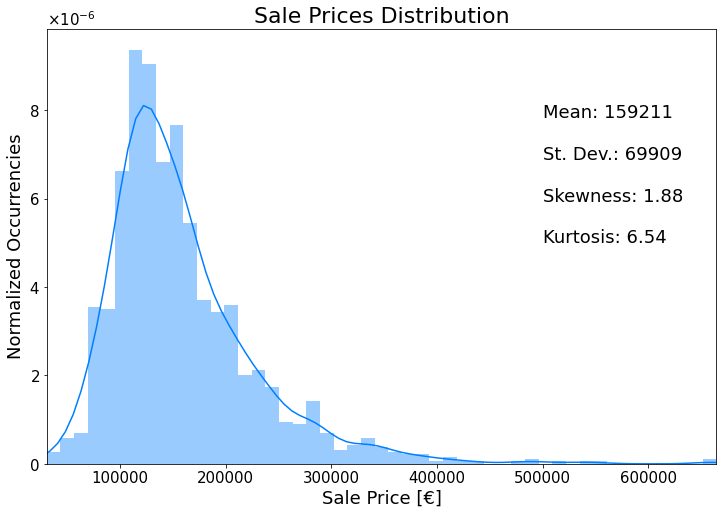

In [87]:
#figure setup
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

#conversion dollar to euro
conv_dollar_to_euro = 0.88
sale_euro = df_train['SalePrice'] * conv_dollar_to_euro

#distribution plot
sns.distplot(sale_euro, color = '#007EFF', hist = True, ax = ax)

#axis limits
ax.set_xlim(left = sale_euro.min(), right = sale_euro.max())

#axis labels
ax.set_xlabel('Sale Price [€]', fontsize = 18)
ax.set_ylabel('Normalized Occurrencies', fontsize = 18)

#title
ax.set_title('Sale Prices Distribution', fontsize = 22)

#axis ticks
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))

#mean
m = 'Mean: ' + format(sale_euro.mean(), '.0f')

#standard deviation
std = 'St. Dev.: ' + format(sale_euro.std(), '.0f')

#skewness
s = 'Skewness: ' + format(sale_euro.skew(), '.2f')

#kurtosis
k = 'Kurtosis: ' + format(sale_euro.kurt(), '.2f')

ax.text(50e4, 5e-6, m + '\n' + '\n' + std + '\n' + '\n' + s + '\n' + '\n' + k, fontsize = 18)

plt.show()

Looks like the distribution is positively skewed, has a quite sharp peak and deviate appreciably from the normal distribution.

Also, the peak is located between 100'000 and 200'000 euros: most houses seems to be in this range of sale (we can easily extend the range to 300'000 euros).

Skewness is a measure of the asymmetry of the probability distribution: for a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right.

Kurtosis, on the other hand, gives a measure of how much the ditribution we are working with deviates from the normal distribution. The kurtosis of any univariate normal distribution is 0, using Fisher's definition. Our distribution seems to be leptokurtic.

### Look for some Correlation between Sale Price and other variables

Some fitting models

In [6]:
def lin(x, a, b):
    return a * x + b

def exp(x, a, b, c):
    return a * np.exp(b * x) + c

At first, let's consider the feature 'GrLivArea' (containing the information of the above grade surface in square feet) and make a scatter plot with the Sale Price:

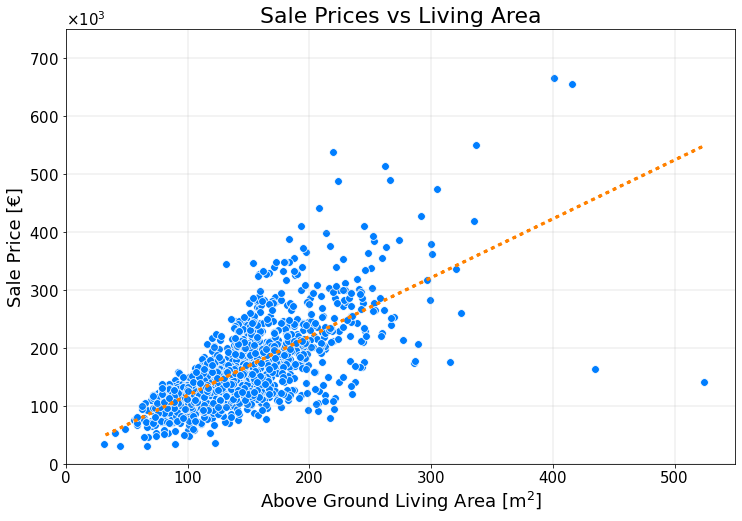

In [91]:
#figure setup
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='both', linewidth = .3)

#conversion dollar to euro
conv_dollar_to_euro = 0.88
sale_euro = df_train['SalePrice'] * conv_dollar_to_euro

#conversion from ft^2 to m^2
conv = 0.092903
gr_liv_area = df_train['GrLivArea'] * conv

#fit model
par_lin, cov_lin = curve_fit(lin, gr_liv_area, sale_euro)

#scatter plot
sns.scatterplot(x = gr_liv_area, y = sale_euro, color = '#007EFF', s = 60, ax = ax)

#fit plot
ax.plot(gr_liv_area, lin(gr_liv_area, *par_lin), color = '#ff8100', linewidth = 3, linestyle = 'dotted')

#axis labels
ax.set_xlabel(r'Above Ground Living Area [m$^2$]', fontsize = 18)
ax.set_ylabel('Sale Price [€]', fontsize = 18)

#title
ax.set_title('Sale Prices vs Living Area', fontsize = 22)

#axis ticks
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3,3))

#axis limits
ax.set_xlim(left = 0, right = 550)
ax.set_ylim(bottom = 0, top = 7.5e5)

plt.show()

As we can see, data points seems to be slightly correlated. Looking at the linear trend, we can notice that the value of the slope is not that high, although the correlation might be strong. We can also see that most of the data points are clustered on the bottom left corner, while fewer points are scattered in the right half of the figure.

Let's consider now 'TotalBsmtSF' (total square feet of basement area) and proce the scatter plot:

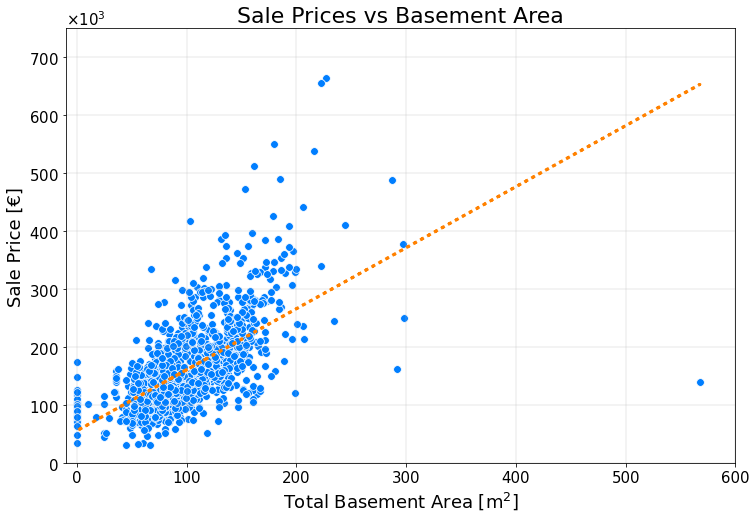

In [92]:
#figure setup
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='both', linewidth = .3)

#conversion dollar to euro
conv_dollar_to_euro = 0.88
sale_euro = df_train['SalePrice'] * conv_dollar_to_euro

#conversion from ft^2 to m^2
conv = 0.092903
basement_surface = df_train['TotalBsmtSF'] * conv

#fit model
par_lin, cov_lin = curve_fit(lin, basement_surface, sale_euro)

#scatterplot
sns.scatterplot(x = basement_surface, y = sale_euro, color = '#007EFF', s = 60, ax = ax)

#fit plot
ax.plot(basement_surface, lin(basement_surface, *par_lin), color = '#ff8100', linewidth = 3, linestyle = 'dotted')

#axis labels
ax.set_xlabel(r'Total Basement Area [m$^2$]', fontsize = 18)
ax.set_ylabel('Sale Price [€]', fontsize = 18)

#title
ax.set_title('Sale Prices vs Basement Area', fontsize = 22)

#axis ticks
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3,3))

#axis limits
ax.set_xlim(left = -10, right = 600)
ax.set_ylim(bottom = 0, top = 7.5e5)

plt.show()

Looking at the bottom left corner, we can see that there are some houses with no basement, while only a few have a very large one. Data points seems to follow a linear correlation, but an exponential correlation has to be taken into account.

We want now to consider some categorical features: by that we mean variables that can take on one of a limited, and usually fixed, number of possible values, assigning each unit of observation to a particular group or nominal category on the basis of some qualitative property.

The first categorical feautre we'd like to analyze is 'OverallQual': itates the overall material and finish of the house using the following notation

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

The best way to visualize categorical feature may be a box plot, but a strip plot (or a swarm plot) does not look bad at all!

Here follows the making of a strip plot: basically we take the categorical data ('OverallQual') on the x axis, so it will have discrete values from 1 to 10 as showed right above, and the sale price on the y axis. For each level of overall quality, we can then seen how the pricing is distributed.

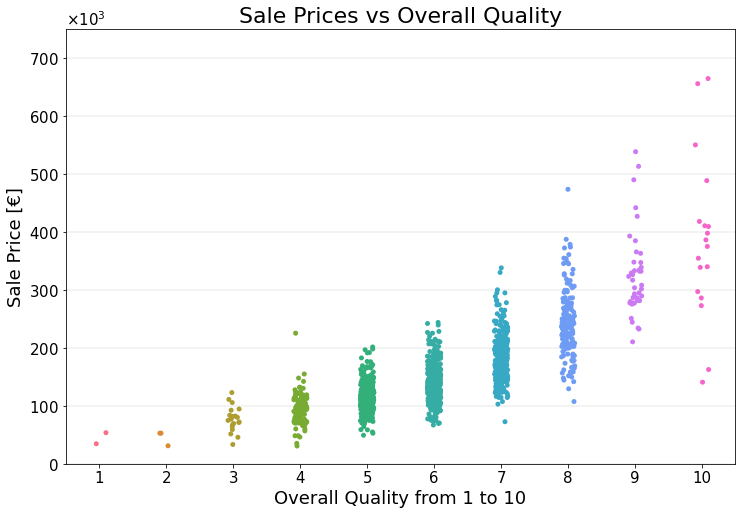

In [94]:
#figure setup
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='y', linewidth = .3)

#conversion dollar to euro
conv_dollar_to_euro = 0.88
sale_euro = df_train['SalePrice'] * conv_dollar_to_euro

#strip plot
sns.stripplot(x = df_train['OverallQual'], y = sale_euro, ax = ax, palette = 'husl')

#axis labels
ax.set_xlabel('Overall Quality from 1 to 10', fontsize = 18)
ax.set_ylabel('Sale Price [€]', fontsize = 18)

#axis title
ax.set_title('Sale Prices vs Overall Quality', fontsize = 22)

#axis ticks
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3,3))

#axis limits
ax.set_xlim(left = -0.5, right = 9.5)
ax.set_ylim(bottom = 0, top = 7.5e5)

plt.show()

A pretty clear ascending trend can be seen between these to feature: nothing unexpected, as it is quite obvious that a better quality house would cost more than a worse quality one. We can also notice that most of the houses range between 5 and 7 (between 'average' and 'good' following the notation provided before). Another interesting fact is that bad quality houses cost little, while there are some top quality ones that cost way less than the average for that quality. We can say then that top quality houses have a more streched strip, while bad quality ones are clustered into a more specific price range.

Another interesting categorical feature is the year of builind of the house ('YearBuilt'). Again here we provide some cool strip plot visualization.

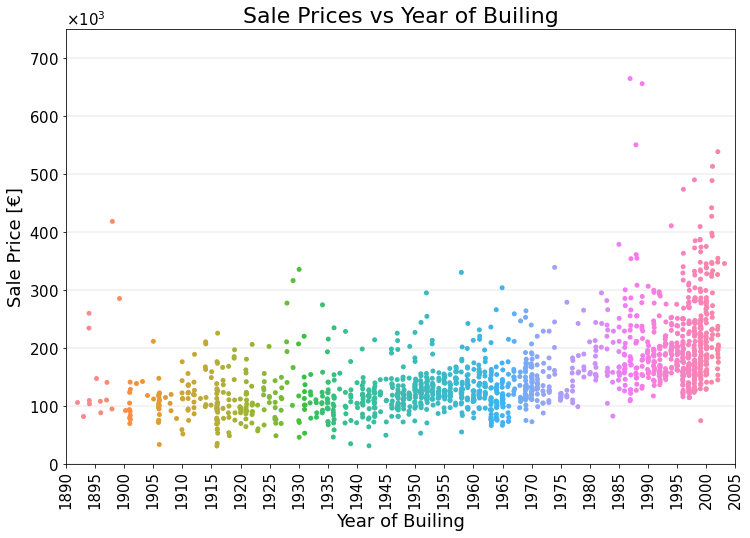

In [95]:
#figure setup
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='y', linewidth = .3)

#conversion dollar to euro
conv_dollar_to_euro = 0.88
sale_euro = df_train['SalePrice'] * conv_dollar_to_euro

#strip plot
sns.stripplot(x = df_train['YearBuilt'], y = sale_euro, ax = ax)

#axis labels
ax.set_xlabel('Year of Builing', fontsize = 18)
ax.set_ylabel('Sale Price [€]', fontsize = 18)

#title
ax.set_title('Sale Prices vs Year of Builing', fontsize = 22)

#axis limits
ax.set_xlim(left = -2, right = 112)
ax.set_ylim(bottom = 0, top = 7.5e5)

#axis ticks
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.yaxis.get_offset_text().set_fontsize(15)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (3,3))
ax.set(xticks=np.arange(-2, 118, 5), xticklabels=np.arange(1890, 2010, 5))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90 )

plt.show()

A slightly increasing trend is visible, but it's clearly not as strong as the 'OverallQual' one. We can say though that pricing is going up decade by decade, as the minimun sale price seems to increase (excluded some evident statistical fluctuations).